# <span style="color:red">Estadistica Nivel Universitario</span>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append(
    '../../Estadistica Computacional con Python/Formulas Estadisticas/')

In [2]:
from formulas_estadisticas import calculo_frecuencias, media, mediana, moda, \
    medidas_posicion, Diagrama_caja_bigotes, varianza, desviacion_estandar, varianza, \
    coeficiente_variacion, asimetria_pearson, calculo_frecuencias, Metodo_binario

In [3]:
pd.set_option('precision', 2)

<a id="1"></a>
### <span style="color:green">Muestra Aleatoria Simple (MAS)</span>

<img src="../imagenes/muestra_aleatoria_simple.jpg" width="200" height="200" align='left'>

* La muestra tiene que ser representativa de la poblacion.
* Tiene la misma probabilidad de ser escogidos, los elementos podrian estar repetidos.

<a id="2"></a>
### <span style="color:green">Variable Aleatoria</span>

Es una **caracteristica de la poblacion**
>*(altura, sexo, ciudad, etc.)*

Sigue un determinado comportamiento llamado **Distribucion**

Hay dos tipos:  
* **Discreta**  
> **Valores enteros, contables, numerables)**  
>**ojo**  tambien las caracteristicas como sexo: <span style="color:blue">[masculino(1)/femenino(2)]</span>, ciudad: <span style="color:blue">[Merida(1), Guadalajara(2), ...]</span> etc, que son descriptivas pero **suceptibles a enumerarse**, son discretas
* **Continua**
>**Valores reales en un intervalo dificilmente repetibles**  
>ejemplo: peso o altura, son muy dificiles de repetir entre los elementos de la muestra

<a id="3"></a>
### <span style="color:green">Objetivo de la Estadistica</span>

### En resumen:
* Nos va a interesar una caracteristica, esa va a ser la **Variable Aleatorea**
* Puede ser una variable de tipo **Discreto** o de tipo **Dontinuo**
* Se mide la caracteristica en una poblacion pero es demasiado grande
* Se toma una **Muestra** representativa de esa caracteristica en la poblacion
* Se <ins>estudia</ins> por completo a la <ins>muestra</ins> para obtener **informacion** de la <ins>poblacion</ins>

<img src="../imagenes/ejemplo_muestreo.jpg" width="300" height="300" align='left'>

<a id="4"></a>
# <span style="color:green">Estadistica Descriptiva</span>

Tiene como objetivo resumir, analizar y sacar conclusiones sobre ese
conjunto de datos.

<img src="../imagenes/estadistica_descriptiva.jpg" width="600" height="600" align='left'>

## Tablas de Frecuencias:
>**Clase:** datos no agrupados.  
>**Frecuencia Absoluta:** cantidad de veces que se repite la clase.  
>**Frecuencia Absoluta Acumulada:** acumula las frecuencias absolutas.  
>**Frecuencia Relativa:** frecuencia absoluta dividida entre el total.  
>**Frecuencia Relativa Acumulada:** acumula las frecuencias relativas.  


## Graficos:
>**Pie:** Cada sector representa la frecuencia absoluta(#) o relativa (%) de cada clase.  
>**Histograma:** Tambien representa las frecuencias absolutas o relativas, sin embargo podemos ver la forma de la distribucion de la variable aleatoria, si existe simetria, donde se concentran mas los valores de la variable.

## Resumenes Numericos:
>**Media:** Promedio.  
>**Mediana:** Es el valor intermedio despues de haber ordenado los datos de menor a mayor.  
>**Moda:** Es el valor que mas se repite.  
>**Varianza** Variabilidad de los datos con respecto a la media al cuadrado de la desviacion tipica, se diferencia de la desviacion tipica porque es necesaria para obtener otros parametros aunque ambas midan lo mismo.  
>**Desviacion Tipica (estandar)** Mide variabilidad de los datos con respecto a la media con la medida inicial o real.

## <span style="color:green">Datos Agrupados y no Agrupados</span>

>**Datos <ins>NO Agrupados</ins>:** Es el conjunto de observaciones que se presentan en su forma original, tal y como fueron recolectados.  
>**Datos <ins>Agrupados</ins>:** Cuando tenemos valores o intervalos de valores y su frecuencia. Es una forma mas compacta de ver los datos.

#### Ejemplo 1
Se ha solicitado a un grupo de 50 individuos informacion sobre el numero de horas que dedican diariamente a dormir. La clasificacion de las respuestas ha permitido elaborar la siguiente tabla:

In [4]:
horas_dormir = {'xi': range(6, 11), 'fa': [3, 16, 20, 10, 1]}
horas_dormir = pd.DataFrame(horas_dormir)
horas_dormir.set_index('xi', inplace=True)

In [5]:
horas_dormir

,fa
xi,
6,3
7,16
8,20
9,10
10,1


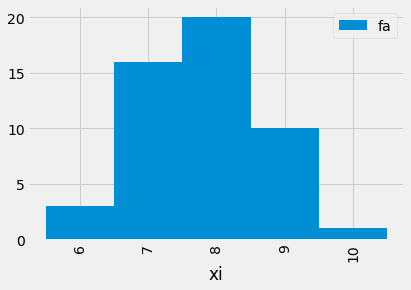

In [6]:
plt.style.use('fivethirtyeight')
horas_dormir.plot(kind='bar', width=1);

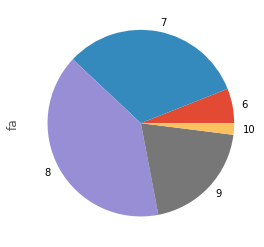

In [7]:
plt.style.use('ggplot')
horas_dormir.plot(kind='pie', y='fa', legend=False);

### Pandas no contempla el calculo para datos agrupados

In [8]:
# Usando formulas de pandas, en general no se puede determinar correctamente para datos agrupados
n_horas = horas_dormir.sum()

media_horas = horas_dormir.mean()

mediana_horas = horas_dormir.median()

# La moda por intervalos no puede determinarse en pandas

std_horas = horas_dormir.std()

var_horas = std_horas**2


print(
f'''n: {n_horas[0]}, media: {media_horas[0]}, 
mediana: {mediana_horas[0]}, 
varianza: {var_horas[0]}, 
desviacion estandar: {std_horas[0]}
'''
)

n: 50, media: 10.0, 
mediana: 10.0, 
varianza: 66.5, 
desviacion estandar: 8.154753215150045



### Usando mis formulas "si" funciona

In [9]:
# Usando mis formulas se puede determinar el resultado para datos agrupados.

n_propia = sum(horas_dormir.iloc[:,0])

media_horas_propia = media(horas_dormir, agrupados=True)

mediana_horas_propia = mediana(horas_dormir, agrupados=True)

moda_horas_propia = moda(horas_dormir, agrupados=True)

std_horas_propia = desviacion_estandar(horas_dormir, agrupados=True)

var_horas_propia = varianza(horas_dormir, agrupados=True)

print(
f'''n: {n_propia}, media: {media_horas_propia}, 
mediana: {mediana_horas_propia}, moda: {moda_horas_propia}, 
varianza: {var_horas_propia}, 
desviacion estandar: {std_horas_propia}
'''
)

n: 50, media: 7.8, 
mediana: 8, moda: 8, 
varianza: 0.8000000000000043, 
desviacion estandar: 0.8944271909999183



#### Ejemplo 2 
#### "Agrupados por invetalos"
Se tienen los siguientes datos de peso en kg de 100 individuos

In [10]:
pesos_individuos = {'intervalos': [(60, 63), (63, 66), (66, 69), (69, 72), (72, 75)], 'fa': [5, 18, 42, 27, 8]}
pesos_individuos = pd.DataFrame(pesos_individuos)
pesos_individuos.set_index('intervalos', inplace=True)

In [11]:
pesos_individuos

,fa
intervalos,
"(60, 63)",5
"(63, 66)",18
"(66, 69)",42
"(69, 72)",27
"(72, 75)",8


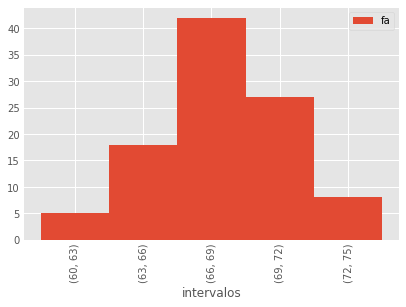

In [12]:
pesos_individuos.plot(kind='bar', width=1);

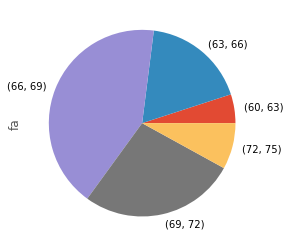

In [13]:
plt.style.use('ggplot')
pesos_individuos.plot(kind='pie', y='fa', legend=False);

In [14]:
media_pesos = media(pesos_individuos, agrupados=True)
mediana_pesos = mediana(pesos_individuos, agrupados=True)
moda_pesos = moda(pesos_individuos, agrupados=True)
varianza_pesos = varianza(pesos_individuos, agrupados=True)
desviacion_pesos = desviacion_estandar(pesos_individuos, agrupados=True)

print(
f'''media: {media_pesos}, 
mediana: {mediana_pesos}, moda: {moda_pesos}, 
varianza: {varianza_pesos}, 
desviacion estandar: {desviacion_pesos}
'''
)

media: 67.95, 
mediana: 67.92857142857143, moda: 67.84615384615384, 
varianza: 8.527499999999236, 
desviacion estandar: 2.920188350089637



## <span style="color:green">Cuantiles, Deciles, Percentiles</span>

Los cuantiles son medidas de posicion relativa que dividen a una distribucion **ordenada** en partes iguales; se clasifican en:  
* Cuartiles (25%, **50%**, 75%) ***<ins>El segundo cuartil es igual a la mediana</ins>***
* Quintiles (20%, 40%, 60%, 80%)
* Deciles (10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90%)
* Percentiles (1%, 2%, 3%, ..., 99%)
    
Es muy importante que los datos esten ordenados.


### Cuartiles

In [15]:
datos_cuartiles1 = pd.DataFrame([1, 2, 3, 4, 5])
datos_cuartiles1

,0
0,1
1,2
2,3
3,4
4,5


In [16]:
medidas_posicion(datos_cuartiles1)

{'Q1': (0.5, 1.5), 'Q2': (2.0, 3), 'Q3': (3.5, 4.5)}

In [17]:
datos_cuartiles2 = pd.DataFrame([1, 2, 3, 4, 5, 6, 7])
datos_cuartiles2

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [18]:
medidas_posicion(datos_cuartiles2)

{'Q1': (1.0, 2), 'Q2': (3.0, 4), 'Q3': (5.0, 6)}

### Deciles

In [19]:
datos_deciles = pd.DataFrame([3, 6, 6, 8, 2, 5, 7, 3, 8, 1, 5, 6, 4, 4, 2, 5, 6, 2, 9, 4, 2, 3, 7, 7, 7])
datos_deciles

,0
0,3
1,6
2,6
3,8
4,2
5,5
6,7
7,3
8,8
9,1


In [20]:
medidas_posicion(datos_deciles, k=10)

{'D1': (1.6, 2.0),
 'D2': (4.2, 2.2),
 'D3': (6.8, 3.0),
 'D4': (9.4, 4.0),
 'D5': (12.0, 5),
 'D6': (14.6, 6.0),
 'D7': (17.2, 6.2),
 'D8': (19.8, 7.0),
 'D9': (22.4, 8.0)}

### Percentiles

Ejercicio.
    Las evaluaciones de 25 clientes sobre el servicio de atencion al cliente de una empresa de venta e instalacion de aparatos de ventilacion son (puntadas entre 0 y 10):
    
    cual es el percentil 85% y que significa?

**Primera opcion para resolver:**  
Usando mi formula de ***medidas_posicion(k=100)*** para percentiles y buscamos el percentil deseado

In [70]:
percentiles = medidas_posicion(datos_deciles, k=100)
percentiles

{'P1': (-0.74, 0.26),
 'P2': (-0.48, 0.52),
 'P3': (-0.22, 0.78),
 'P4': (0.04, 1.04),
 'P5': (0.3, 1.3),
 'P6': (0.56, 1.56),
 'P7': (0.82, 1.82),
 'P8': (1.08, 2.0),
 'P9': (1.34, 2.0),
 'P10': (1.6, 2.0),
 'P11': (1.86, 2.0),
 'P12': (2.12, 2.0),
 'P13': (2.38, 2.0),
 'P14': (2.64, 2.0),
 'P15': (2.9, 2.0),
 'P16': (3.16, 2.0),
 'P17': (3.42, 2.0),
 'P18': (3.68, 2.0),
 'P19': (3.94, 2.0),
 'P20': (4.2, 2.2),
 'P21': (4.46, 2.46),
 'P22': (4.72, 2.72),
 'P23': (4.98, 2.98),
 'P24': (5.24, 3.0),
 'P25': (5.5, 3.0),
 'P26': (5.76, 3.0),
 'P27': (6.02, 3.0),
 'P28': (6.28, 3.0),
 'P29': (6.54, 3.0),
 'P30': (6.8, 3.0),
 'P31': (7.06, 3.06),
 'P32': (7.32, 3.32),
 'P33': (7.58, 3.58),
 'P34': (7.84, 3.84),
 'P35': (8.1, 4.0),
 'P36': (8.36, 4.0),
 'P37': (8.62, 4.0),
 'P38': (8.88, 4.0),
 'P39': (9.14, 4.0),
 'P40': (9.4, 4.0),
 'P41': (9.66, 4.0),
 'P42': (9.92, 4.0),
 'P43': (10.18, 4.18),
 'P44': (10.44, 4.44),
 'P45': (10.7, 4.7),
 'P46': (10.96, 4.96),
 'P47': (11.22, 5.0),
 'P48':

In [87]:
percentil_a_buscar = 'P85'
resultado_percentil_a_buscar = percentiles[percentil_a_buscar]
print(
f'''
Esto es, que el {percentil_a_buscar[1:]}% de los clientes, {round(resultado_percentil_a_buscar[0],0)} clientes, dan una evaluacion de {round(resultado_percentil_a_buscar[1],0)}
o inferior.
''')


Esto es, que el 85% de los clientes, 21.0 clientes, dan una evaluacion de 7.0
o inferior.



#### Segunda opcion para resolver:
Usando mi formula ***calculo_frecuencias()***  
Buscamos la frecuencia relativa inmediata, que contenga el porcentaje deseado.

In [88]:
intervalos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

frecuencias = calculo_frecuencias(datos_deciles, intervalos=intervalos)

df_frecuencias = pd.DataFrame(frecuencias1)

# Establecemos los nombres de las columnas y el index
df_frecuencias = df_frecuencias.transpose().set_index(0).transpose().set_index('xi')

df_frecuencias

,fa,faa,fr,far
xi,,,,
1,1,1,0.04,0.04
2,4,5,0.16,0.2
3,3,8,0.12,0.32
4,3,11,0.12,0.44
5,3,14,0.12,0.56
6,4,18,0.16,0.72
7,4,22,0.16,0.88
8,2,24,0.08,0.96
9,1,25,0.04,1.0


In [108]:
porcentaje_a_buscar = .85
mascara_puntaje = df_frecuencias['far'] > porcentaje_a_buscar
index_resultado = df_frecuencias[mascara_puntaje].index.min()

resultado = df_frecuencias.loc[index_resultado]
resultado

0
fa        4
faa      22
fr     0.16
far    0.88
Name: 7, dtype: object

In [110]:
print(
f'''
Quiere decir que el {porcentaje_a_buscar} de los clientes, {resultado['faa']} clientes, dieron una calificacion de {index_resultado} o menos
''')


Quiere decir que el 0.85 de los clientes, 22 clientes, dieron una calificacion de 7 o menos

